### Imports and function definitions.

In [1]:
import numpy as np
import numpy.ma as ma
from pandas import read_hdf
from oceans.RPSstuff import near


def get_data(fname, key):
    data  = read_hdf(fname, key)
    lon = data.columns.values.astype(float)
    lat = data.index.values.astype(float)

    levels = data.values.astype(float)
    data = ma.masked_invalid(data.values)
    lon, lat = np.meshgrid(lon, lat)
    return lon, lat, data

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree(), figsize=(10, 5),
             resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    ax.set_global()
    ax.coastlines(resolution=resolution, color='k')
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    # Gridlines.
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    # Work around writing longitude position twice (e.g.: 180W and 180E).
    gl.xlocator = mticker.FixedLocator([-60, -120, -180, 120, 60, 0])
    return fig, ax

### Download the data.

In [3]:
boundary = dict(llcrnrlon=0, urcrnrlon=360, llcrnrlat=-90, urcrnrlat=90)

### Figure options.

In [4]:
fmt = 'png'
kfig = dict(format=fmt, transparent=True, dpi=75)
kcbar = dict(extend='both', shrink=0.75, pad=0.02, fraction=0.1,
             orientation='vertical')
proj = dict(transform=ccrs.PlateCarree())
kw = dict(colors='k', alpha=0.75, **proj)

### Salinity anomaly for austral summer (surface).

In [5]:
lon, lat, annual = get_data('woa09_salinity.h5', 'salinity')
lon, lat, summer = get_data('woa09_salinity_seasonal.h5', 'salinity')

data = annual - summer

/usr/lib64/python3.4/site-packages/matplotlib/artist.py:196: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


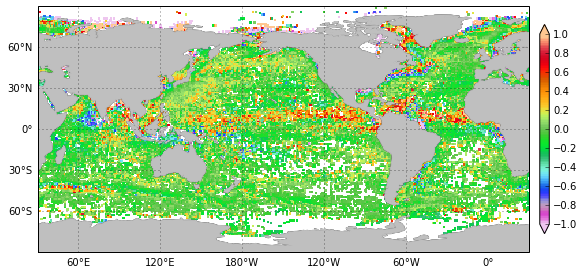

In [6]:
%matplotlib inline
from oceans.colormaps import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


fig, ax = make_map(projection=ccrs.PlateCarree(central_longitude=-150))

cs = ax.pcolormesh(lon, lat, data, cmap=cm.odv, **proj)
cs.set_clim(-1, 1)
_ = fig.colorbar(cs, **kcbar)

In [7]:
import os


fname = 'woa09_salinity_summer_anomaly.%s' % fmt
fig.savefig(fname, **kfig)
_ = os.system('convert -trim %s %s' % (fname, fname))

### Temperature animaly for austral summer (surface).

In [8]:
lon, lat, annual = get_data('woa09_temperature.h5', 'temperature')
lon, lat, summer = get_data('woa09_temperature_seasonal.h5', 'temperature')

data = annual - summer

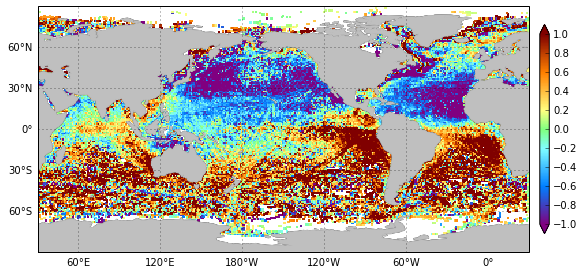

In [9]:
fig, ax = make_map(projection=ccrs.PlateCarree(central_longitude=-150))
cs = ax.pcolormesh(lon, lat, data, cmap=cm.avhrr, **proj)
cs.set_clim(-1, 1)
_ = fig.colorbar(cs, **kcbar)

In [10]:
fname = 'woa09_temperature_summer_anomaly.%s' % fmt
fig.savefig(fname, **kfig)
_ = os.system('convert -trim %s %s' % (fname, fname))